In [2]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df['z_score'] = zscore(df['total_bill'])

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,z_score
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


- pivot table or contengency table or cross tab

NaN could be replace, fillna, drop
- median is best way to use replace when we have skewness
- drop when you think the value is not important or has majority of NaN value

In [7]:
df = pd.DataFrame({'a':[1,2,np.nan,np.nan],
                  'b':[2,5,7,np.nan],
                   'c':[3,np.nan,np.nan,np.nan]
                  })

In [8]:
df

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [9]:
df.dropna() #if any element in row then drop it

,a,b,c
0,1.0,2.0,3.0


In [10]:
df.dropna(how='all') #rows in all element are null is dropped

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,NaN,7.0,NaN


In [11]:
df.dropna(axis=1) #if any element in column then drop it

""
0
1
2
3


In [12]:
df.dropna(thresh=1) #atleast one non-null value in a row

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,NaN,7.0,NaN


In [13]:
df.dropna(thresh=2) #atleast two non-null value in a row

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN


In [14]:
df.dropna(thresh=3) #atleast three non-null value in a row

,a,b,c
0,1.0,2.0,3.0


In [15]:
df.dropna(thresh=2, axis=1) #atleast two non-null value in a column

,a,b
0,1.0,2.0
1,2.0,5.0
2,NaN,7.0
3,NaN,NaN


In [16]:
df.fillna(0) # every value is filled with zero

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,0.0
2,0.0,7.0,0.0
3,0.0,0.0,0.0


In [17]:
df['a'].fillna(0,inplace=True) # every NaN value is filled with zero in perticular column
df

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [18]:
df['a'] = df['a'].fillna(0)  # every NaN value is filled with zero in perticular column
df

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [19]:
df.fillna(method='ffill') #forward filling

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,3.0
2,0.0,7.0,3.0
3,0.0,7.0,3.0


In [20]:
df.fillna(method='bfill') #backward filling / no value because it below NaN there is not value

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [21]:
df['b']=df['b'].fillna(df['b'].mean()) #replacing NaN with b column mean value
df

,a,b,c
0,1.0,2.000000,3.0
1,2.0,5.000000,NaN
2,0.0,7.000000,NaN
3,0.0,4.666667,NaN


### Bivariant and Multivariant

In [22]:
df = sns.load_dataset('tips')

In [23]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


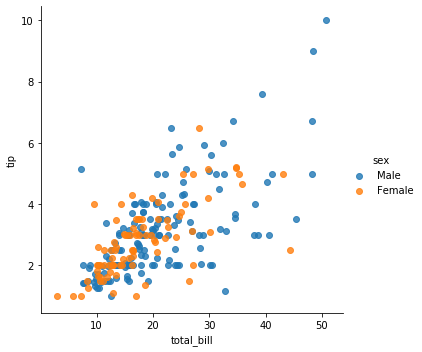

In [24]:
sns.lmplot(data=df, x='total_bill',y='tip',fit_reg=False,hue='sex')
plt.show()

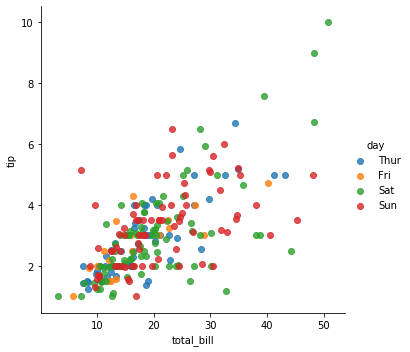

In [25]:
sns.lmplot(data=df, x='total_bill',y='tip',fit_reg=False,hue='day')
plt.show()

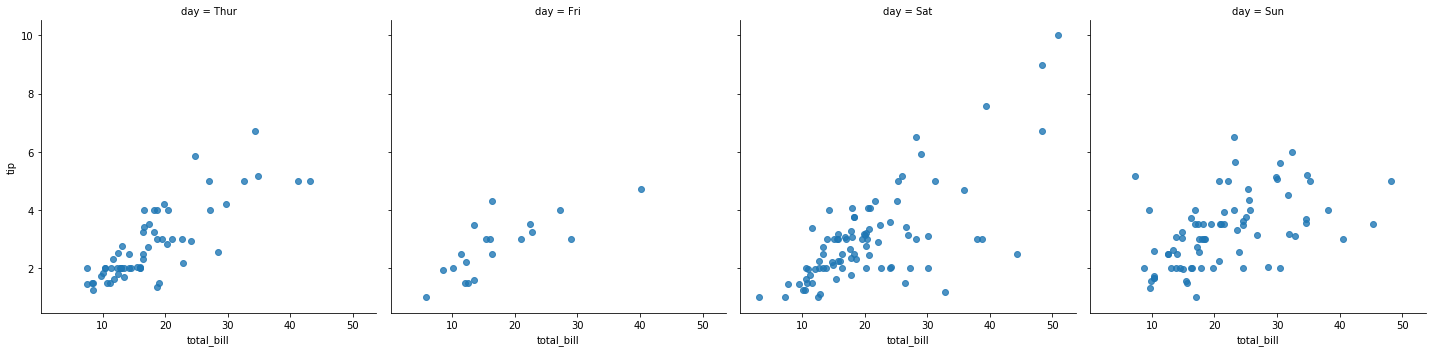

In [26]:
sns.lmplot(data=df, x='total_bill',y='tip',fit_reg=False,col='day')
plt.show()

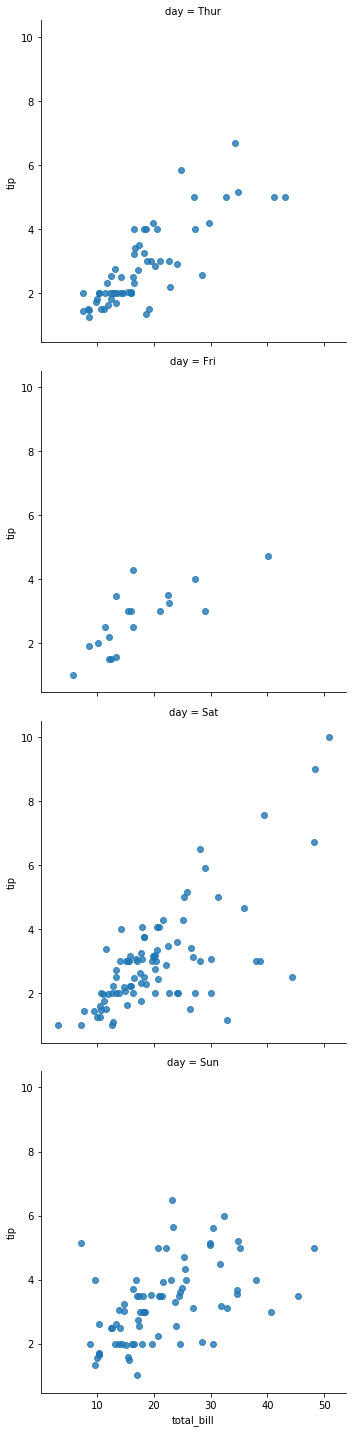

In [27]:
sns.lmplot(data=df, x='total_bill',y='tip',fit_reg=False,row='day')
plt.show()

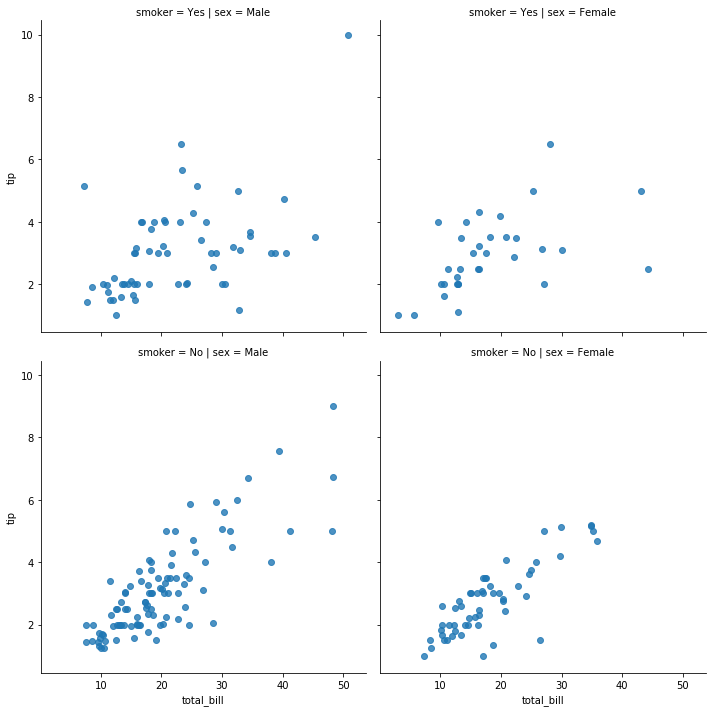

In [28]:
sns.lmplot(data=df, x='total_bill',y='tip',fit_reg=False,col='sex',row='smoker')
plt.show()

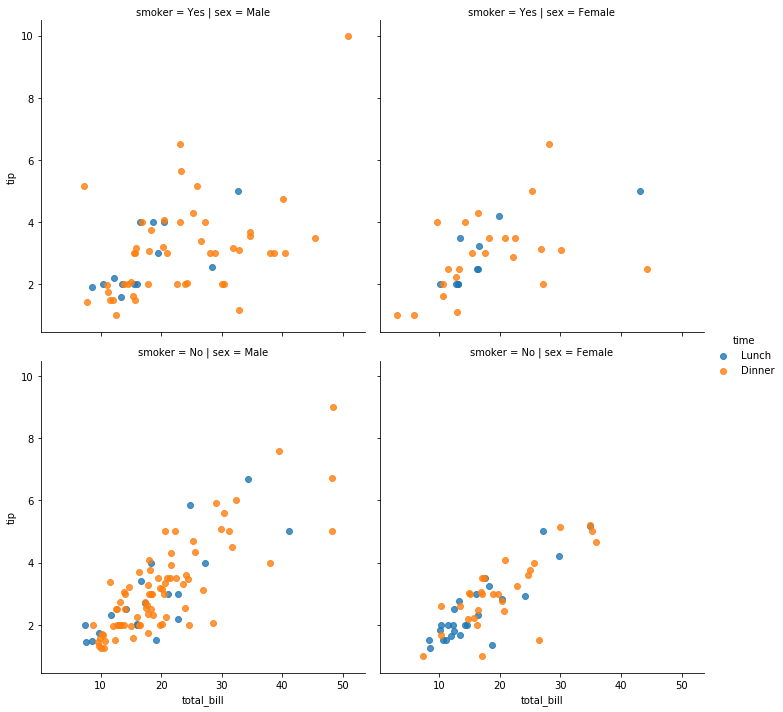

In [29]:
sns.lmplot(data=df, x='total_bill',y='tip',hue='time',fit_reg=False,col='sex',row='smoker')
plt.show()

In [30]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


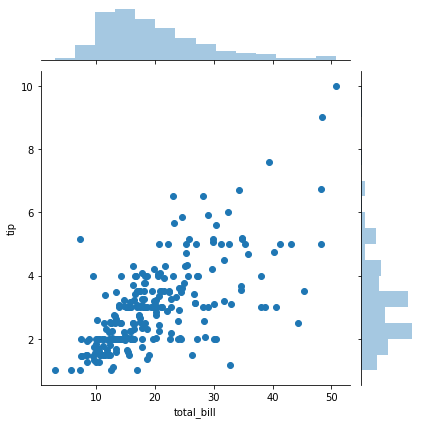

In [31]:
sns.jointplot(x='total_bill',y='tip',data=df)
plt.show()

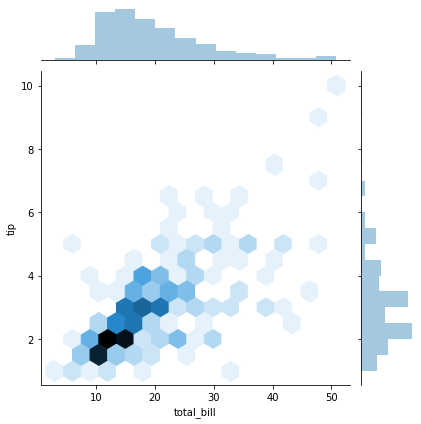

In [32]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')
plt.show()

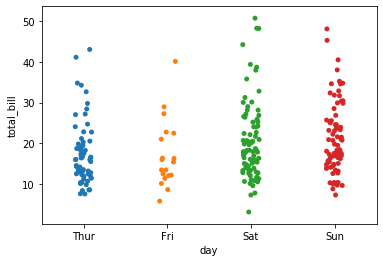

In [33]:
sns.stripplot(data=df,x='day',y='total_bill')
plt.show()

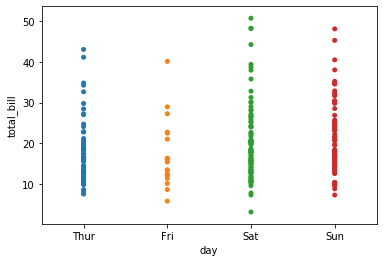

In [34]:
sns.stripplot(data=df,x='day',y='total_bill',jitter=False)
plt.show()

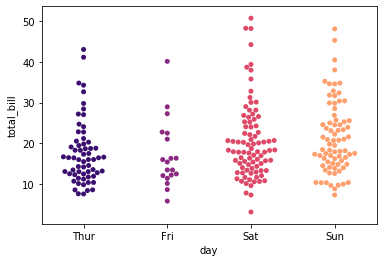

In [35]:
sns.swarmplot(data=df,x='day',y='total_bill',palette='magma')
plt.show()

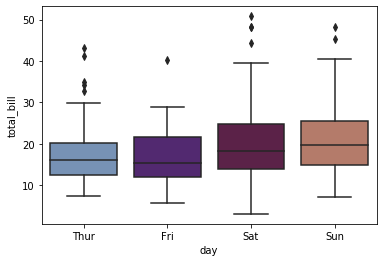

In [36]:
sns.boxplot(data=df,x='day',y='total_bill', palette='twilight')
plt.show()

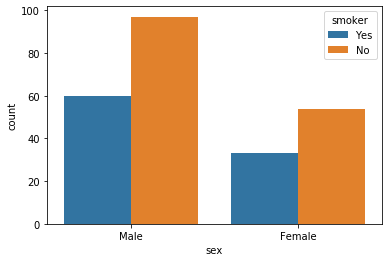

In [37]:
sns.countplot(x='sex',data=df,hue='smoker')
plt.show()

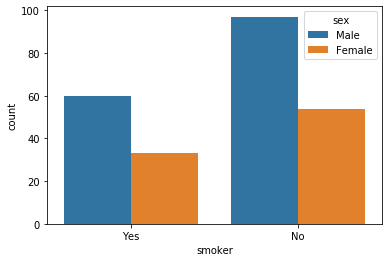

In [38]:
sns.countplot(x='smoker',data=df,hue='sex')
plt.show()

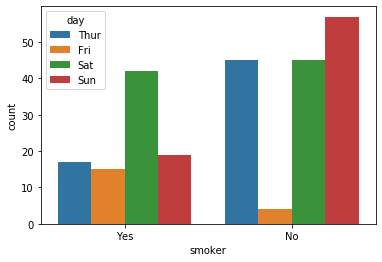

In [39]:
sns.countplot(x='smoker',data=df,hue='day')
plt.show()

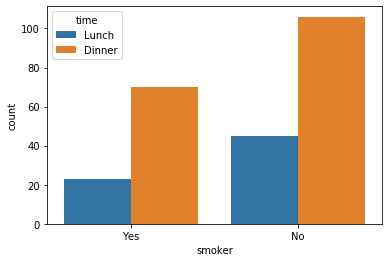

In [40]:
sns.countplot(x='smoker',data=df,hue='time')
plt.show()

In [41]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [42]:
df.groupby(['sex','smoker']).agg({'smoker':'count'})

smoker
sex    smoker        
Male   Yes         60
       No          97
Female Yes         33
       No          54

In [43]:
df.groupby(['sex','smoker']).count()['size'] #another way for above code

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: size, dtype: int64

In [44]:
df.pivot_table(index='sex',columns='smoker',values='size',aggfunc='count') #using pivot table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [45]:
df.groupby(['sex','day']).agg({'tip':'max'}) #highest tip given by male and female on different days

tip
sex    day        
Male   Thur   6.70
       Fri    4.73
       Sat   10.00
       Sun    6.50
Female Thur   5.17
       Fri    4.30
       Sat    6.50
       Sun    5.20

In [46]:
df.groupby(['sex','day']).max()['tip'] #another way for above code

sex     day 
Male    Thur     6.70
        Fri      4.73
        Sat     10.00
        Sun      6.50
Female  Thur     5.17
        Fri      4.30
        Sat      6.50
        Sun      5.20
Name: tip, dtype: float64

In [47]:
pd.crosstab(df['sex'],df['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [48]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [49]:
cor = df[['total_bill','tip']].corr()

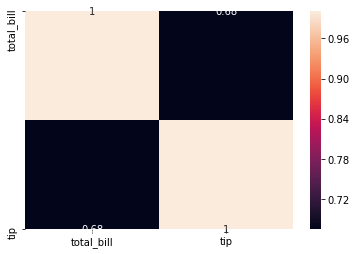

In [50]:
sns.heatmap(cor,annot=True)
plt.show()

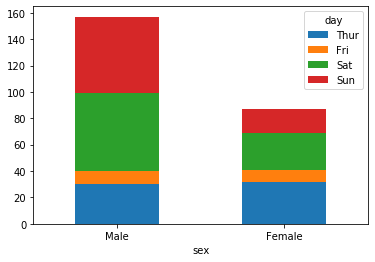

In [51]:
a=pd.crosstab(df['sex'],df['day'])
a.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.show()

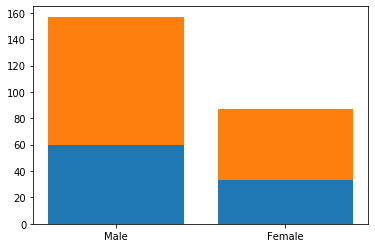

In [52]:
a = df['sex'][df['smoker']=='Yes'].value_counts()
b = df['sex'][df['smoker']=='No'].value_counts()
plt.bar(a.index,a.values)
plt.bar(b.index,b.values,bottom=a.values)
plt.show()

In [53]:
master = pd.read_csv('C:\\Users\\RasAlGhul\\GreatLakes\\DataSet\\master-1.csv')
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [54]:
master.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [55]:
master.shape

(27820, 12)

In [56]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [57]:
master.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [58]:
master.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [59]:
def fun(a):
    perc=(a.isnull().sum()/a.shape[0])*100
    b=pd.DataFrame({'No_of_null' : a.isnull().sum(),
                    'percentage' : perc
                   })
    return b


In [60]:
df = pd.DataFrame({'a':[1,2,np.nan,np.nan],
                  'b':[2,5,7,np.nan],
                   'c':[3,np.nan,np.nan,np.nan]
                  })
df

,a,b,c
0,1.0,2.0,3.0
1,2.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [61]:
print(fun(df))

   No_of_null  percentage
a           2        50.0
b           1        25.0
c           3        75.0


In [62]:
master.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


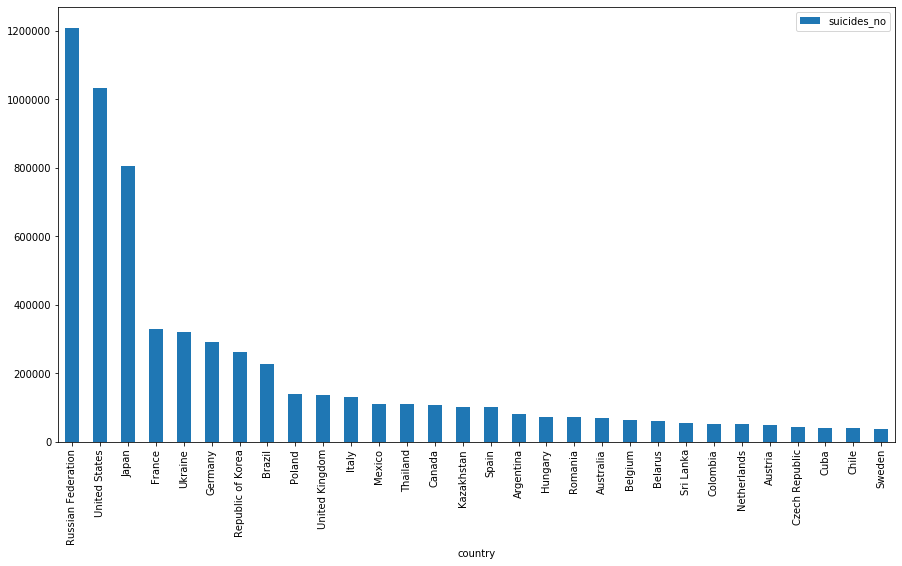

In [63]:
da = master.groupby(['country']).agg({'suicides_no':'sum'}).sort_values('suicides_no',ascending=False).head(30).plot(
    kind='bar',figsize=(15,8))
plt.show()

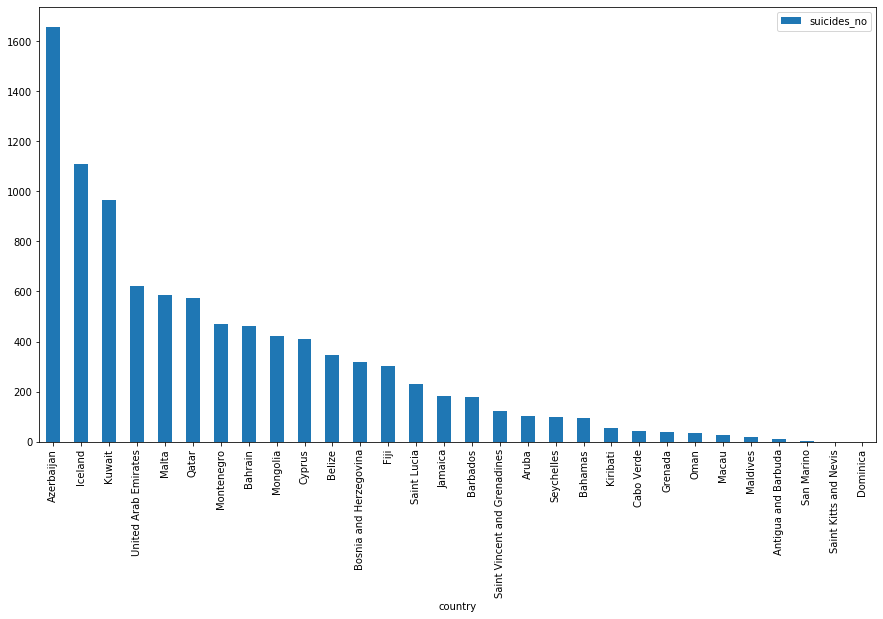

In [64]:
da = master.groupby(['country']).agg({'suicides_no':'sum'}).sort_values('suicides_no',ascending=False).tail(30).plot(
    kind='bar',figsize=(15,8))
plt.show()

In [65]:
master.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


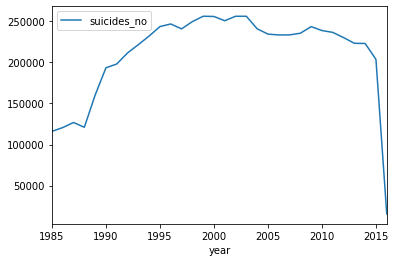

In [66]:
master.groupby('year').agg({'suicides_no':sum}).plot.line()
plt.show()

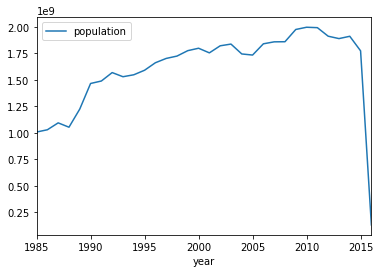

In [67]:
master.groupby('year').agg({'population':sum}).plot.line()
plt.show()

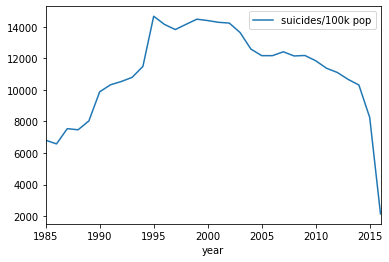

In [68]:
master.groupby('year').agg({'suicides/100k pop':sum}).plot.line()
plt.show()

In [69]:
master.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


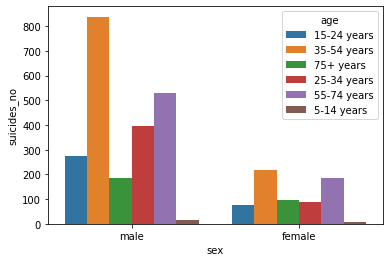

In [70]:
sns.barplot(x='sex',y='suicides_no',data=master,hue='age',ci=0)
plt.show()

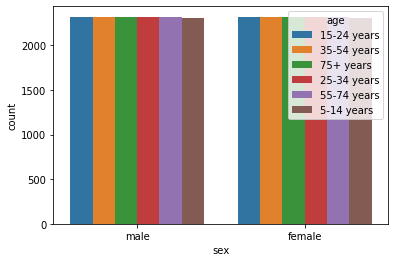

In [71]:
sns.countplot(x='sex',data=master,hue='age')
plt.show()

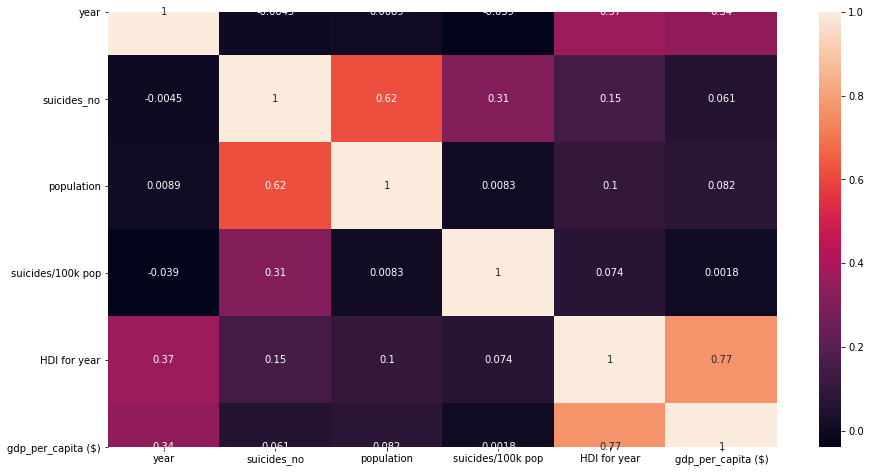

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(master.corr(),annot=True)
plt.show()